In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

2025-05-07 18:36:55.324871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746643015.353085    2960 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746643015.361448    2960 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load IMDB dataset
vocab_size = 10000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [3]:
# Pad sequences to ensure uniform input length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [4]:
# Build the model
model = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2025-05-07 18:37:03.614511: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2, verbose=1)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5317 - loss: 0.6903 - val_accuracy: 0.6702 - val_loss: 0.6688
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6943 - loss: 0.6536 - val_accuracy: 0.7818 - val_loss: 0.5800
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7866 - loss: 0.5488 - val_accuracy: 0.8234 - val_loss: 0.4625
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8360 - loss: 0.4301 - val_accuracy: 0.8388 - val_loss: 0.3881
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8646 - loss: 0.3523 - val_accuracy: 0.8592 - val_loss: 0.3483
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8789 - loss: 0.3065 - val_accuracy: 0.8498 - val_loss: 0.3406
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8930 - loss: 0.2734 - val_accuracy: 0.8672 - val_loss: 0.3176
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9066 - loss: 0.2463 - val_accuracy: 0.8578 - v

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8755 - loss: 0.2959
Test Accuracy: 0.8753


In [12]:
from sklearn.metrics import classification_report, roc_auc_score

# Get predictions
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification metrics
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# AUC-ROC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {auc:.3f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.87     12500
    Positive       0.87      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

AUC-ROC: 0.946


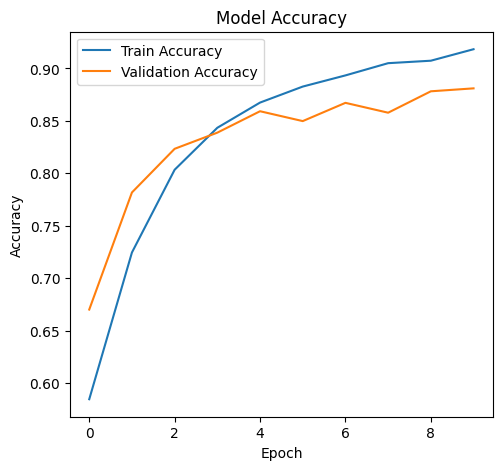

In [8]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

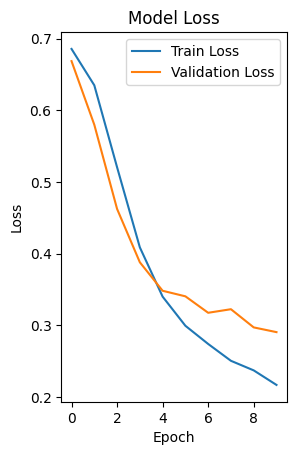

In [9]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [10]:
# Show sample predictions
y_pred_probs = model.predict(x_test[:10])
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [11]:
for i in range(10):
    print(f"Review {i+1} - Predicted: {'Positive' if y_pred_classes[i][0] == 1 else 'Negative'}, Actual: {'Positive' if y_test[i] == 1 else 'Negative'} ")

Review 1 - Predicted: Negative, Actual: Negative 
Review 2 - Predicted: Positive, Actual: Positive 
Review 3 - Predicted: Positive, Actual: Positive 
Review 4 - Predicted: Negative, Actual: Negative 
Review 5 - Predicted: Positive, Actual: Positive 
Review 6 - Predicted: Positive, Actual: Positive 
Review 7 - Predicted: Positive, Actual: Positive 
Review 8 - Predicted: Negative, Actual: Negative 
Review 9 - Predicted: Positive, Actual: Negative 
Review 10 - Predicted: Positive, Actual: Positive 


In [ ]:
# ### 🔍 Explanation of Core Concepts Used in the Code

# This section explains each major **machine learning, deep learning, and evaluation** concept used in your binary classification code for IMDB sentiment analysis.

# ---

# ### 🧠 1. **Embedding Layer**

# ```python
# layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen)
# ```

# * **Purpose**: Converts word indices into dense vector representations (embeddings).
# * **input\_dim**: Size of the vocabulary (e.g., 10,000 most frequent words).
# * **output\_dim**: Dimension of each word vector (e.g., 32-dimensional vector).
# * **input\_length**: Maximum length of each input sequence (e.g., 200 words).

# 📌 Embeddings capture semantic meaning: similar words have similar vectors (e.g., “good” and “great”).

# ---

# ### 🧮 2. **GlobalAveragePooling1D**

# ```python
# layers.GlobalAveragePooling1D()
# ```

# * Averages the embedding vectors across all time steps (i.e., across the sequence).
# * Reduces the 3D tensor output of `Embedding` (batch × sequence length × embedding dim) to 2D (batch × embedding dim).
# * Ensures fixed-size input to the next Dense layer, independent of sequence length.

# 📌 It summarizes the entire sentence into a single fixed-size vector.

# ---

# ### 🔗 3. **Dense Layer with ReLU Activation**

# ```python
# layers.Dense(64, activation='relu')
# ```

# * Fully connected (dense) layer with 64 neurons.
# * **ReLU (Rectified Linear Unit)**: activation function defined as `f(x) = max(0, x)`.
# * Introduces non-linearity, allowing the model to learn complex patterns in the data.

# 📌 ReLU is computationally efficient and helps with gradient flow.

# ---

# ### 🎯 4. **Dense Output Layer with Sigmoid Activation**

# ```python
# layers.Dense(1, activation='sigmoid')
# ```

# * Produces a single output value (probability between 0 and 1).
# * **Sigmoid** activation function maps input to a probability:

#   ```
#   f(x) = 1 / (1 + e^(-x))
#   ```

# 📌 Used in binary classification where the model must decide between two classes (positive vs negative sentiment).

# ---

# ### ⚙️ 5. **Binary Crossentropy Loss Function**

# ```python
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# ```

# * **Binary Crossentropy**: Measures how well the predicted probabilities match the actual labels (0 or 1).
# * Formula:

#   $$
#   L = -[y \cdot \log(p) + (1 - y) \cdot \log(1 - p)]
#   $$

#   where `y` is true label, `p` is predicted probability.

# 📌 Minimizing this loss helps the model predict probabilities close to true labels.

# ---

# ### ⚡ 6. **Adam Optimizer**

# * Combines the advantages of **Momentum** and **RMSProp** optimizers.
# * Adapts learning rates for each parameter using estimates of first and second moments of gradients.

# 📌 Efficient, widely used optimizer that usually performs well with minimal tuning.

# ---

# ### 📏 7. **Accuracy Metric**

# * Percentage of correctly classified examples:

#   $$
#   \text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Samples}}
#   $$

# 📌 Works well if classes are balanced but can be misleading for imbalanced datasets.

# ---

# ### 📊 8. **Classification Report**

# ```python
# from sklearn.metrics import classification_report
# ```

# * Outputs **precision**, **recall**, **F1-score**, and **support** for each class.

# | Metric    | Definition                                                |
# | --------- | --------------------------------------------------------- |
# | Precision | TP / (TP + FP) — How many predicted positives are correct |
# | Recall    | TP / (TP + FN) — How many actual positives are detected   |
# | F1 Score  | Harmonic mean of precision and recall                     |
# | Support   | Number of actual samples per class                        |

# 📌 Essential for understanding performance beyond accuracy.

# ---

# ### 📈 9. **ROC AUC Score**

# ```python
# from sklearn.metrics import roc_auc_score
# ```

# * **ROC (Receiver Operating Characteristic)** plots TPR vs FPR at various thresholds.
# * **AUC (Area Under Curve)**: single number summary of model's ability to distinguish classes.

# | AUC Value | Interpretation |
# | --------- | -------------- |
# | 0.5       | Random guess   |
# | 0.7–0.8   | Acceptable     |
# | 0.8–0.9   | Excellent      |
# | >0.9      | Outstanding    |

# 📌 Good for evaluating performance when you care about both false positives and false negatives.

# ---

# Would you like a diagram showing how the data flows through this network?
